In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df=pd.read_csv("/Users/sunitjadeja/Desktop/Python/Logistic_ML_Data.csv")
# print (df)
# print (df.head())
# print (df.info)

In [4]:
# df.head()
# df.dtypes
df.info()
df=df.drop(columns=["Unnamed: 32"])  ####for dropping the columns
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   concavity_mean           569 non-null    float64
 6   symmetry_mean            569 non-null    float64
 7   fractal_dimension_mean   569 non-null    float64
 8   texture_se               569 non-null    float64
 9   area_se                  569 non-null    float64
 10  smoothness_se            569 non-null    float64
 11  concavity_se             569 non-null    float64
 12  symmetry_se              569 non-null    float64
 13  fractal_dimension_se     569 non-null    float64
 14  smoothness_worst         5

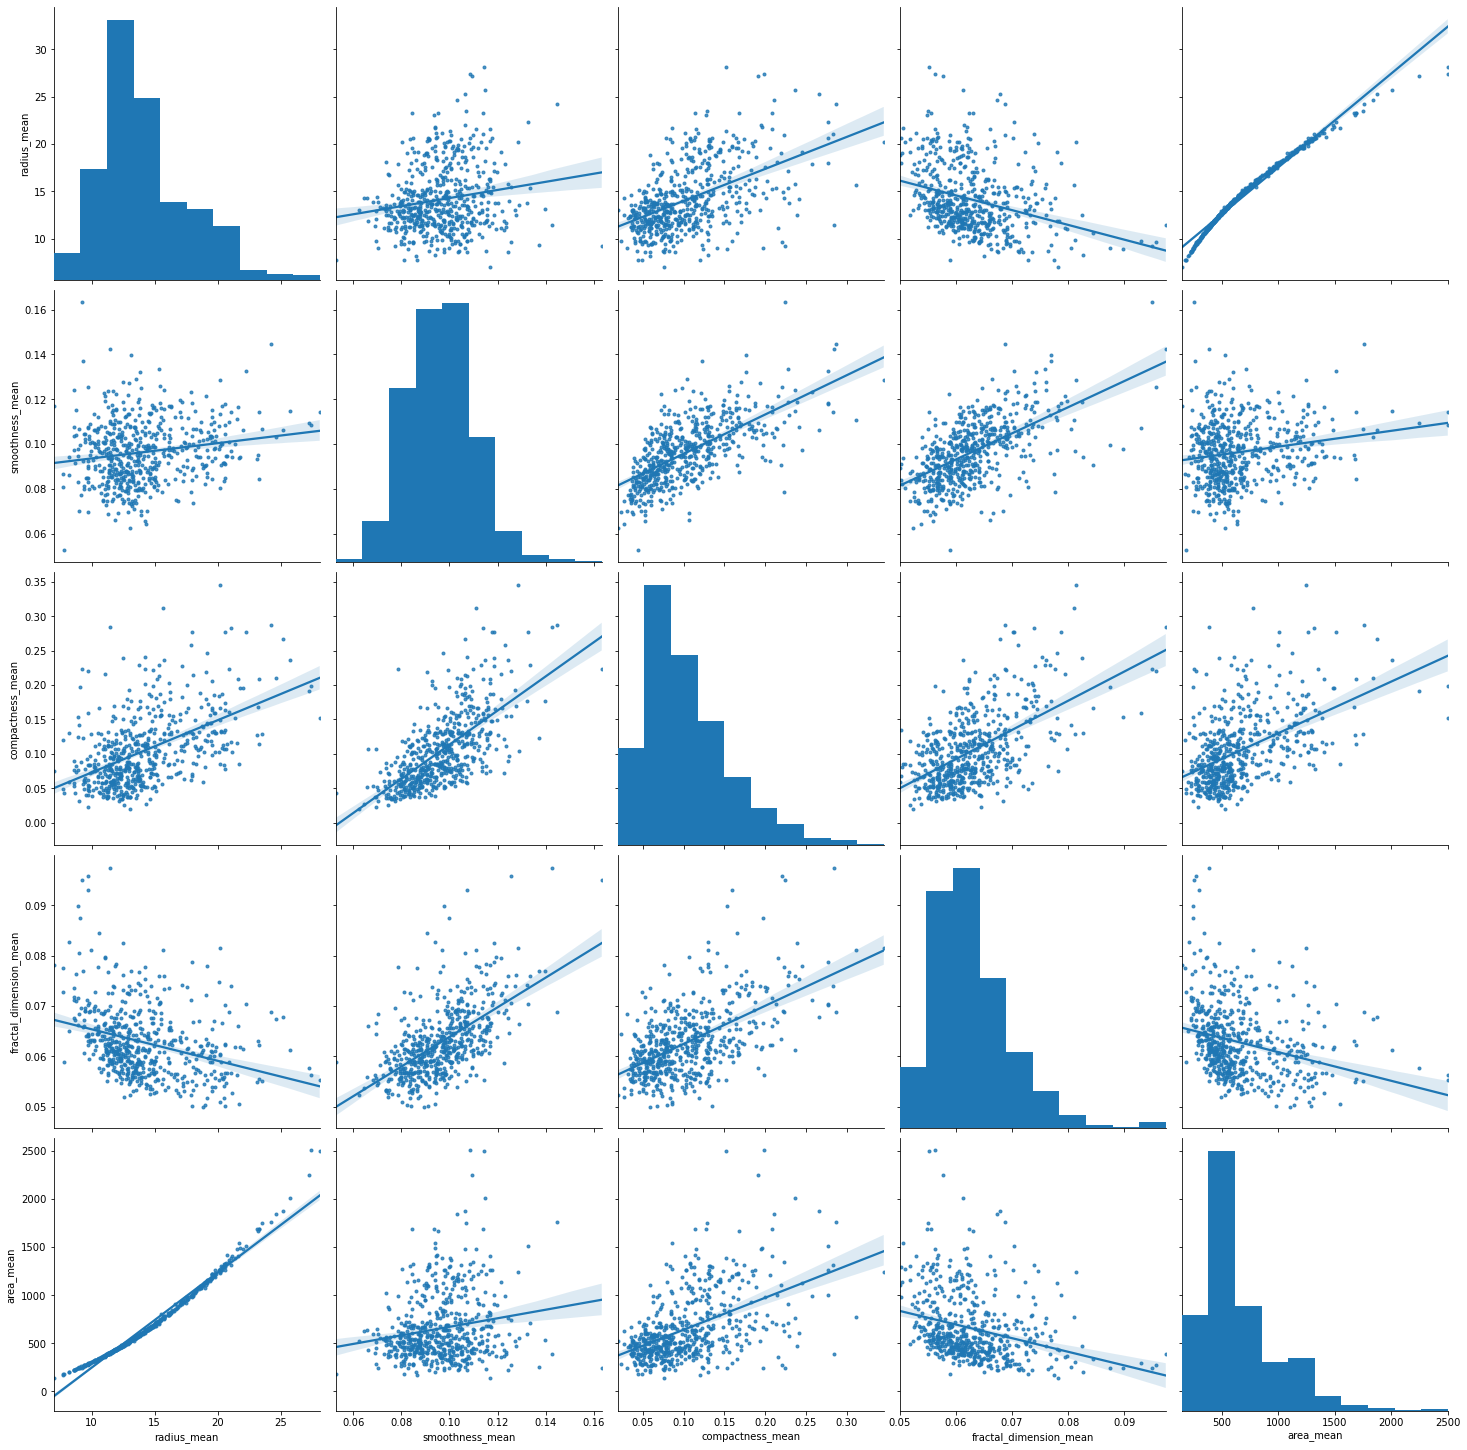

In [16]:
df_n = df[['radius_mean','smoothness_mean','compactness_mean','fractal_dimension_mean','area_mean']]
sns.pairplot(df_n , height=4, kind="reg",markers=".") ####sns function in seaborn lib is useful to know the relationship between diff. pairs of attributes in data

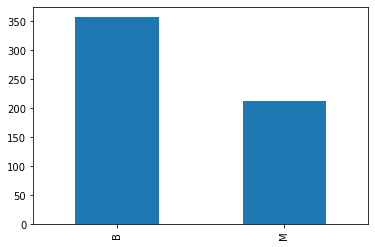

In [17]:
df['diagnosis'].value_counts()
df['diagnosis'].value_counts().plot.bar() ###count for categorical variables of Benign & Malign type of cancer

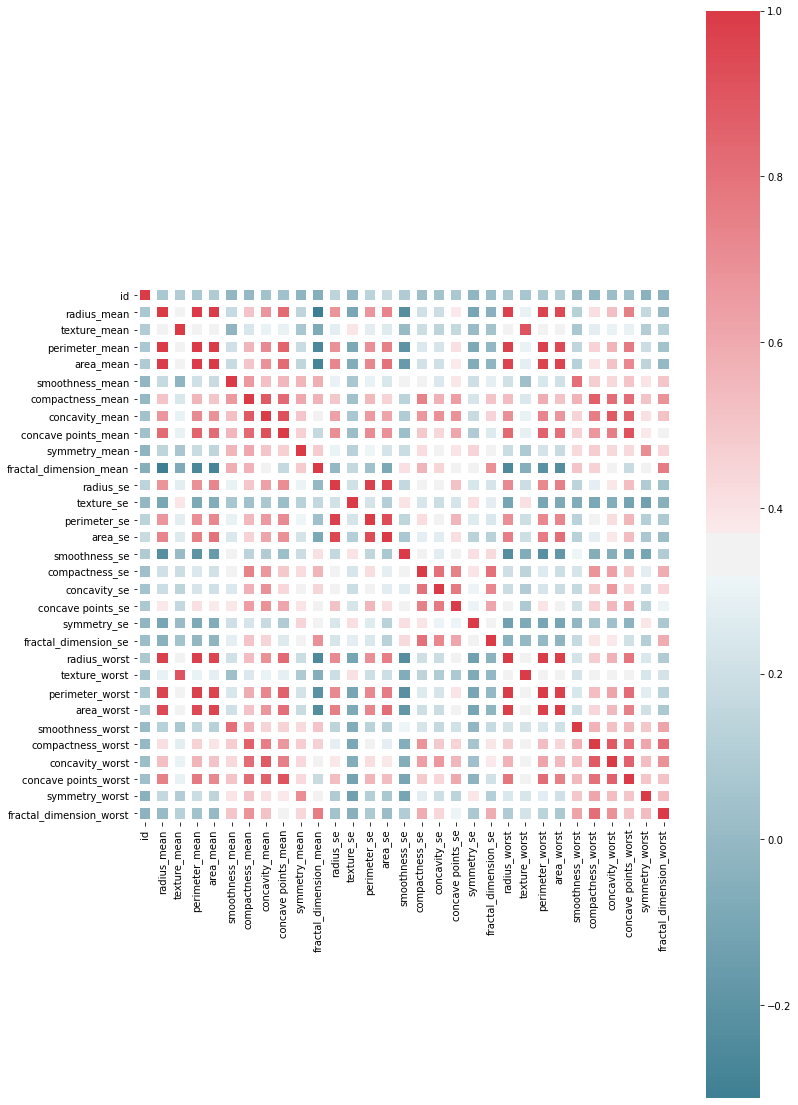

In [18]:
corr = df.corr()
#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(12, 20))
sns.heatmap(corr,cmap=cmap,square=True,linewidths=6) ### a heatmap to represent the varying degrees of correlation visually: done by sns function of seaborn
####the perimeter_mean and area_mean is highly correlated to radius_ mean. That's because both the perimeter and the area values are highly likely to use the radius variable.
####the compactness_se and the concave points_se are highly correlated to compactness_mean and concave_means.

In [3]:
cols_drop = ['perimeter_mean','area_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
df = df.drop(cols_drop,axis = 1 )
print(df)

           id diagnosis  radius_mean  texture_mean  smoothness_mean  \
0      842302         M        17.99         10.38          0.11840   
1      842517         M        20.57         17.77          0.08474   
2    84300903         M        19.69         21.25          0.10960   
3    84348301         M        11.42         20.38          0.14250   
4    84358402         M        20.29         14.34          0.10030   
..        ...       ...          ...           ...              ...   
564    926424         M        21.56         22.39          0.11100   
565    926682         M        20.13         28.25          0.09780   
566    926954         M        16.60         28.08          0.08455   
567    927241         M        20.60         29.33          0.11780   
568     92751         B         7.76         24.54          0.05263   

     concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0           0.30010         0.2419                 0.07871      0.9053   

In [25]:
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])
y = df["diagnosis"]
X = df.drop(columns=['diagnosis'])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
#create an instance and fit the model
logit = LogisticRegression()
logit.fit(X_train, y_train)
Y_predict = logit.predict(X_test)
print(classification_report(y_test,Y_predict)) ###We use prediction for dependent variable(benign or malign breast cancer) from test data

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        40
           1       0.00      0.00      0.00        17

    accuracy                           0.70        57
   macro avg       0.35      0.50      0.41        57
weighted avg       0.49      0.70      0.58        57



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
print(confusion_matrix(y_test, Y_predict)) ###As we will increase the test data the the accurachy of model will improve & c.matrix will also be better

[[40  0]
 [17  0]]


In [49]:
###The accuracy of model is 70%, which is the best percentage I can get from this model. 
###confusion matrix numbers of False Negatives (0) and the number of False Positives (17) are quite less